#Googletrends News Artikel
Im folgenden Jupiter Notebook werden die drei meistgenannten Wörter aus der Textanalyse der NZZ Schlagzeilen analysiert. Diese sind Ukraine / Russland / Krieg.

In [ ]:
pip install pytrends

  Created wheel for pytrends: filename=pytrends-4.8.0-py3-none-any.whl size=16126 sha256=bcf6b1d770729eed99908e29b9434b7972585161f2bfb3eebdd968eb9e494bc4
  Stored in directory: /root/.cache/pip/wheels/07/6f/5c/8174f98dec1bfbc7d5da4092854afcbcff4b26c3d9b66b5183
Successfully built pytrends


Pytrends ist eine API, um Googlesuchtrends zu analysieren.

In [ ]:
from pytrends.request import TrendReq
pytrends = TrendReq (hl='de-CH')

In [5]:
all_keywords = ['Russland', 'Ukraine', 'Krieg']
cat ='0'
geo = 'CH'
timeframe='today 3-m'
gprop=''
pytrends.build_payload(all_keywords, 
                       cat, 
                       timeframe, 
                       geo, 
                       gprop)

Mit dem oberen Code connecten wir uns mit Google. Dabei definieren wir mit "hl" die hostlanguage Deutsch (Schweiz). Ausserdem definieren wir die Keywords Russland, Ukraine und Krieg. Dabei interessieren uns die Suchbegriffe in der Schweiz und der Zeitraum von heute bis 3 Monate zurück.

In [6]:
data = pytrends.interest_over_time()
data

,Russland,Ukraine,Krieg,isPartial
date,,,,
2022-02-04,1,1,0,False
2022-02-05,1,2,0,False
2022-02-06,1,2,0,False
2022-02-07,1,2,1,False
2022-02-08,1,2,0,False
...,...,...,...,...
2022-04-28,2,7,1,False
2022-04-29,2,7,1,False
2022-04-30,2,9,2,False


Der Befehl pytrends.interest_over_time() gibt ein Pandas-Datenframe zurück, das historische Daten enthält, wann das Schlüsselwort am häufigsten gesucht wurde.

In [ ]:
print(data.head(89))

            Russland  Ukraine  Krieg  isPartial
date                                           
2022-02-03         0        0      0      False
2022-02-04         0        0      0      False
2022-02-05         0        0      0      False
2022-02-06         0        1      0      False
2022-02-07         0        0      0      False
...              ...      ...    ...        ...
2022-04-27         1        2      0      False
2022-04-28         0        2      0      False
2022-04-29         0        2      0      False
2022-04-30         0      100      0      False
2022-05-01         0        0      0       True

[88 rows x 4 columns]


In [7]:
import matplotlib.pyplot as plt

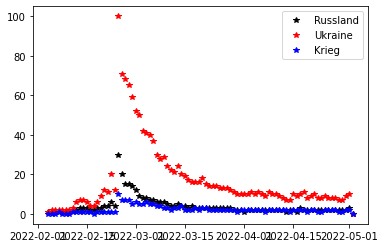

In [8]:
plt.figure()
plt.plot(data.index,data.Russland,'k*')
plt.plot(data.index,data.Ukraine,'r*')
plt.plot(data.index,data.Krieg,'b*')
plt.legend(['Russland','Ukraine','Krieg'])

Bei der Analyse der Daten fällt auf, dass die Kurve immer zwischen 0 und 100 liegt. Dies zeigt nicht an, wie oft ein Suchbegriff eingegeben wurde, sondern der relative Wert der Suchanfrage. Es zeigt das Verhältnis des eingegeben Suchbegriffes aller in diesem Zeitraum getätigten Suchbegriffe an.

In [9]:
pytrends.build_payload(kw_list=['Ukraine'], timeframe='today 3-m', geo='CH')
df_rt = pytrends.related_topics()

In [10]:
print(df_rt['Ukraine']['rising'].head(5))

    value formattedValue                                               link  \
0  105900      Ausreißer  /trends/explore?q=/m/04f40d2&date=today+3-m&ge...   
1   98300      Ausreißer  /trends/explore?q=/m/0204sn&date=today+3-m&geo=CH   
2   35150      Ausreißer  /trends/explore?q=/m/03v6hq&date=today+3-m&geo=CH   
3   16950      Ausreißer  /trends/explore?q=/m/08k8jt&date=today+3-m&geo=CH   
4   15550      Ausreißer   /trends/explore?q=/m/05hyf&date=today+3-m&geo=CH   

    topic_mid          topic_title            topic_type  
0  /m/04f40d2          Glückskette                 Thema  
1   /m/0204sn               Spende                 Thema  
2   /m/03v6hq    Nachrichtenticker                 Thema  
3   /m/08k8jt                Opfer                 Thema  
4    /m/05hyf  Nationalsozialismus  Politische Ideologie  


In [11]:
df_rq = pytrends.related_queries()

In [12]:
print(df_rq)

{'Ukraine': {'top':                         query  value
0                ukraine news    100
1            russland ukraine     56
2               ukraine krieg     40
3              ukraine russie     36
4                      russie     36
5             ukraine schweiz     23
6              guerre ukraine     20
7            ukraine konflikt     18
8                      russia     14
9              russia ukraine     14
10     ukraine russland krieg     11
11              putin ukraine     11
12            ukraine aktuell     10
13               ukraine live     10
14      guerre russie ukraine     10
15                srf ukraine      8
16                ukraine war      8
17  konflikt ukraine russland      5
18      russland ukraine news      4
19              russland news      4
20        flüchtlinge ukraine      4
21             suisse ukraine      4
22                map ukraine      3
23               nato ukraine      3
24                glückskette      3, 'rising':        

Der Unterschied zwischen related queries und related topics ist, dass related queries verwandte Suchanfragen sind und related topics nicht unbedingt das Wort selbst enthalten müssen, sondern in einem Bezug zu diesem stehen.

In [13]:
pytrends.trending_searches (pn='switzerland')

,0
0,Tagesschau
1,Katie Holmes
2,Jil Teichmann
3,Thomas Müller
4,Kaia Gerber
5,Azovstal
6,Liverpool
7,Swisscom
8,Villarreal gegen Liverpool
9,Met Gala 2022 theme


Zeigt die aktuellen Suchtrends, Stichtag heute